In [1]:
import tensorflow 
import keras

Using TensorFlow backend.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [3]:
train_df = pd.read_csv("dataset/train.csv")
test_df = pd.read_csv("dataset/test.csv")

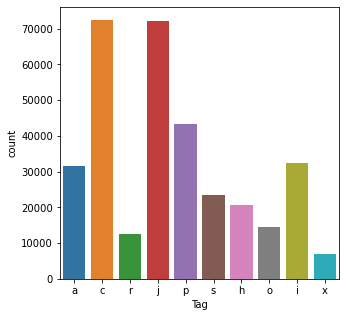

In [4]:
plt.figure(figsize=(5,5))
sns.countplot(train_df['Tag'])

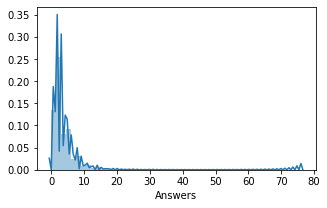

In [5]:
plt.figure(figsize=(5,3))
sns.distplot(train_df['Answers'])

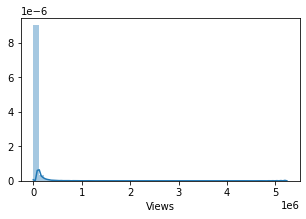

In [6]:
plt.figure(figsize=(5,3))
sns.distplot(train_df['Views'])

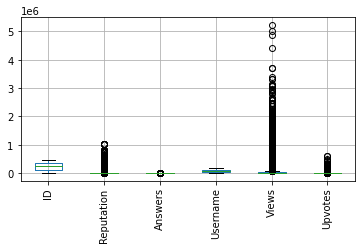

In [7]:
train_df.boxplot(rot=90,figsize=(6,3))

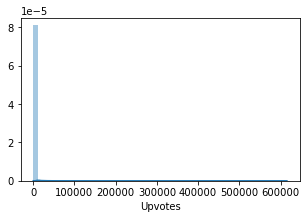

In [8]:
plt.figure(figsize=(5,3))
sns.distplot(train_df['Upvotes'])

In [9]:
x = train_df.drop(columns=["ID","Username","Upvotes"])
y = train_df.Upvotes.values
x.head()

,Tag,Reputation,Answers,Views
0,a,3942.0,2.0,7855.0
1,a,26046.0,12.0,55801.0
2,c,1358.0,4.0,8067.0
3,a,264.0,3.0,27064.0
4,c,4271.0,4.0,13986.0


In [10]:
x_val = test_df.drop(columns=['ID','Username'])

In [11]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,RobustScaler,MinMaxScaler,StandardScaler,Binarizer

In [12]:
le = LabelEncoder()
bn = Binarizer(threshold=7)
x['Tag'] = le.fit_transform(x['Tag'])
pd_reach = bn.transform([train_df['Answers']])[0]
x['pd_reach'] = pd_reach

x_val['Tag'] = le.transform(x_val['Tag'])
pd_reach_test = bn.transform([x_val['Answers']])[0]
x_val['pd_reach'] = pd_reach_test

In [13]:
transformer = make_column_transformer((StandardScaler(),['Tag', 'Reputation', 'Answers','Views',
                                       'pd_reach']))                                     

In [14]:
print(le.classes_)
print(le.transform(le.classes_))

['a' 'c' 'h' 'i' 'j' 'o' 'p' 'r' 's' 'x']
[0 1 2 3 4 5 6 7 8 9]


In [15]:
import joblib

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [18]:
x_train = transformer.fit_transform(x_train)
x_test = transformer.transform(x_test)

In [19]:
x_val = transformer.fit_transform(x_val)

In [20]:
filename = "column_trans2.sav"

joblib.dump(transformer,filename)

['column_trans2.sav']

In [69]:
#from sklearn.neighbors import KNeighborsClassifier

In [29]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.metrics import r2_score

In [28]:
poly_reg = PolynomialFeatures(degree = 5,interaction_only=False, include_bias=True)
X_poly = poly_reg.fit_transform(x_train)
poly_reg.fit(x_train, y_train)
lin_reg_1 = linear_model.LassoLars(alpha=0.021,max_iter=150)
lin_reg_1.fit(X_poly, y_train)

LassoLars(alpha=0.021, max_iter=150)

In [30]:
y_pred_on_test = lin_reg_1.predict(poly_reg.fit_transform(x_test))

In [31]:
print(r2_score(y_test,y_pred_on_test))

0.8405216279247956


In [33]:
y_pred = lin_reg_1.predict(poly_reg.fit_transform(x_val))
y_pred = abs(y_pred)

In [34]:
sub = pd.DataFrame({"ID":test_df.ID,'Upvotes':y_pred})

In [35]:
sub.to_csv('Submissions.csv',index=False)

In [37]:
filename_model = 'Models/final_model.sav'
joblib.dump(lin_reg_1,filename_model)

filename_poly = 'Models/poly_trans.sav'
joblib.dump(poly_reg,filename_poly)

['Models/poly_trans.sav']